In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split,cross_val_score, RandomizedSearchCV
from sklearn.metrics import  root_mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.pipeline import  Pipeline
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import  LGBMRegressor
from sklearn.linear_model import  LinearRegression,Ridge,Lasso,ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import os


In [2]:
%pwd

'd:\\data_science\\MLOPS\\Red-Wine-Quality\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'd:\\data_science\\MLOPS\\Red-Wine-Quality'

In [5]:
df= pd.read_csv(r"data\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.duplicated().sum()

240

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


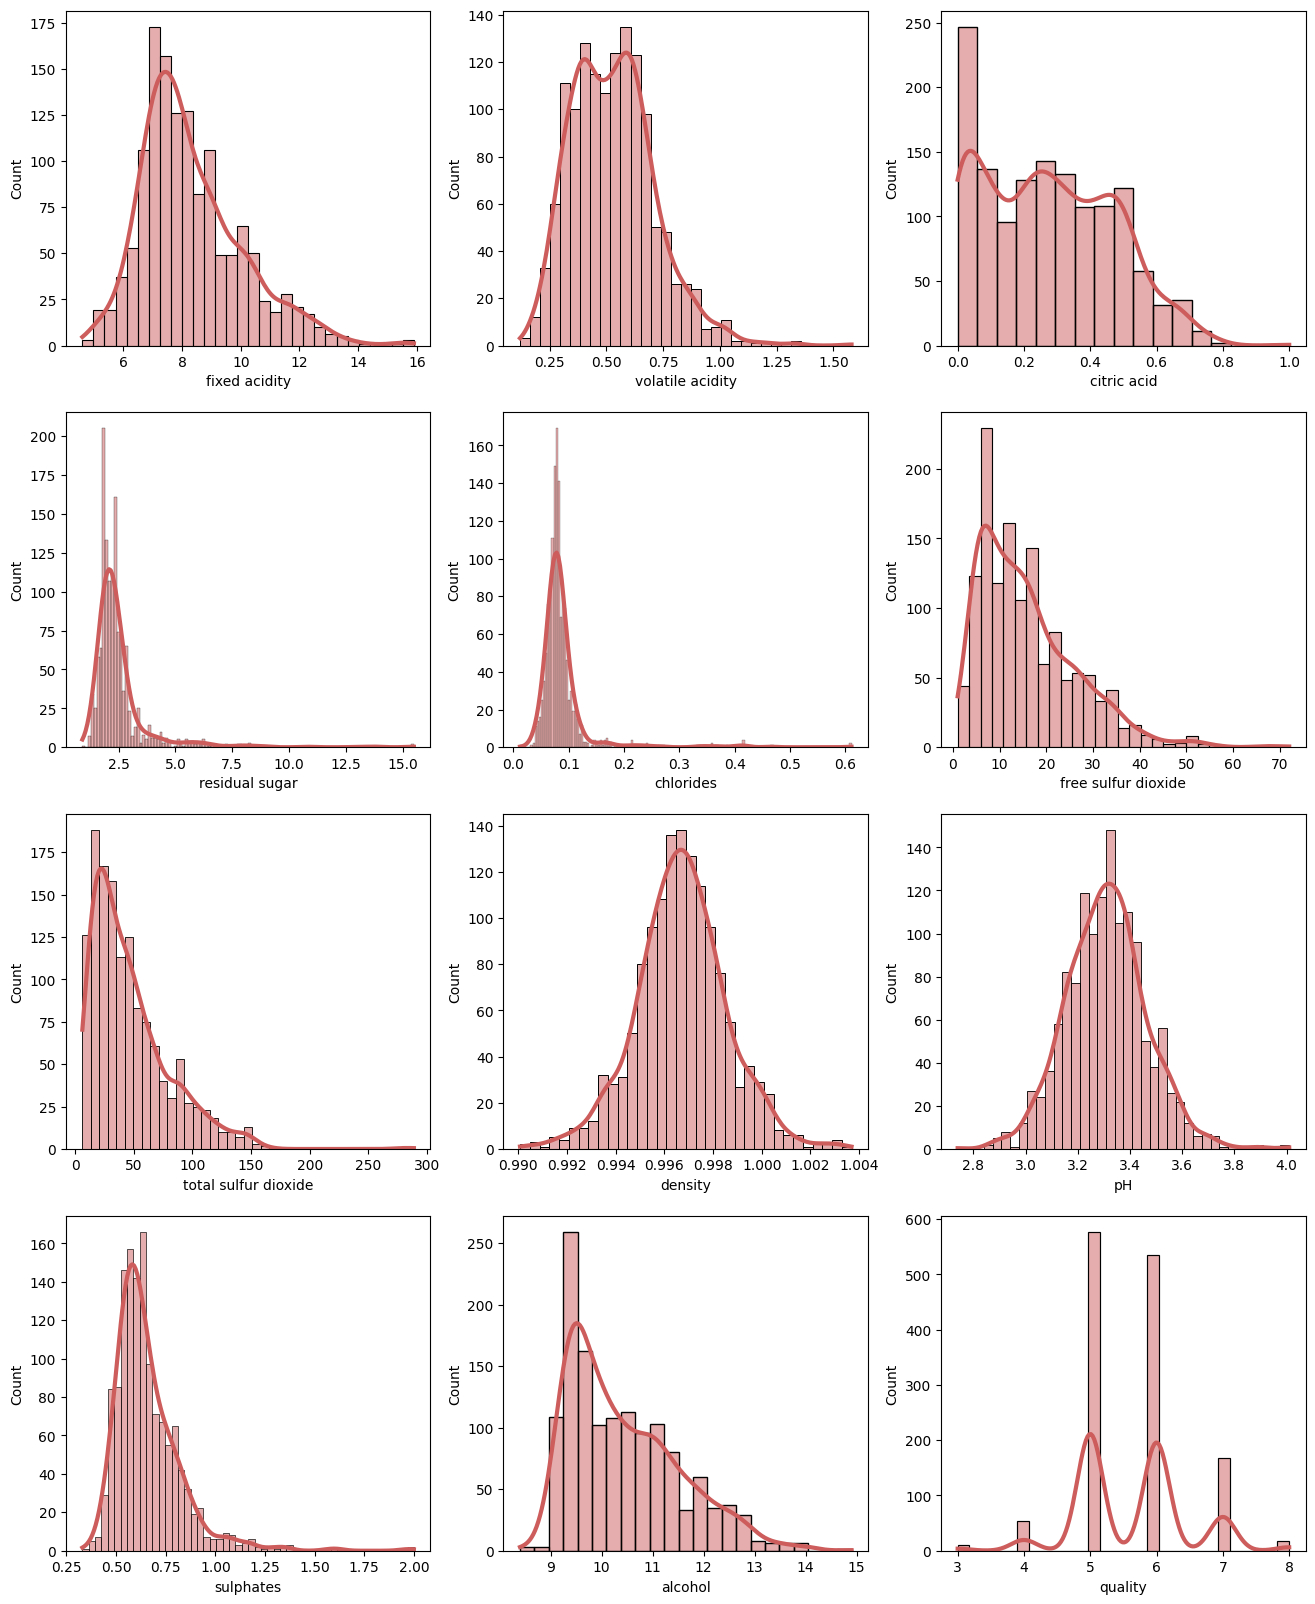

In [11]:
plt.figure(figsize=(16,20))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    sns.histplot(df[col],kde=True, color="indianred",line_kws={"linewidth": 3});

In [12]:
X=df.drop("quality",axis=1)
y=df["quality"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [14]:
scaler=StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.36096247,  0.52659007, -1.2063737 , ...,  0.2141197 ,
        -0.7621721 , -0.85594162],
       [-0.07037884,  0.61110657, -0.89858832, ..., -0.12165742,
         0.5375673 ,  0.43922842],
       [ 0.04585461, -0.88201832,  0.79423126, ..., -0.9275225 ,
         0.89204168,  0.71676486],
       ...,
       [-0.59342937,  0.80831175, -1.30896883, ...,  0.07980885,
         0.12401385,  0.59341533],
       [-0.18661229, -1.22008434,  0.89682639, ..., -1.06183334,
         0.89204168,  1.91942275],
       [ 1.8474731 , -0.994707  ,  1.10201664, ...,  0.07980885,
         1.48283232,  0.53174057]])

In [15]:
models = {
    "Linear Regression": (LinearRegression(), {}),
    
    "Ridge Regression": (Ridge(), {"alpha": uniform(0.1, 10)}),
    
    "Lasso Regression": (Lasso(), {"alpha": uniform(0.001, 1)}),
    
    "ElasticNet": (ElasticNet(), {"alpha": uniform(0.001, 1), "l1_ratio": uniform(0, 1)}),
    
    "Random Forest": (RandomForestRegressor(), {
        "n_estimators": randint(50, 300),
        "max_depth": randint(3, 20)
    }),
    
    "SVR (Support Vector)": (SVR(), {
        "C": uniform(0.1, 10),
        "epsilon": uniform(0.01, 1)
    }),
    
    "KNN Regressor": (KNeighborsRegressor(), {"n_neighbors": randint(1, 20)}),
    
    "Bayesian Ridge": (BayesianRidge(), {"alpha_1": uniform(1e-6, 1e-3), "lambda_1": uniform(1e-6, 1e-3)}),
    
    "XGBRegressor": (XGBRegressor(), {
        "n_estimators": randint(50, 300),
        "max_depth": randint(3, 20),
        "learning_rate": uniform(0.01, 0.3)
    }),
    
    "CatBoostRegressor": (CatBoostRegressor(verbose=0), {
        "iterations": randint(50, 300),
        "depth": randint(3, 10),
        "learning_rate": uniform(0.01, 0.3)
    }),
    
    "LGBMRegressor": (LGBMRegressor(), {
        "n_estimators": randint(50, 300),
        "max_depth": randint(3, 20),
        "learning_rate": uniform(0.01, 0.3)
    })
}

In [16]:
results = []
for name, (model,param_dist) in models.items():
    

    # Perform RandomizedSearchCV only if parameters exist
    if param_dist:
        search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_  # Best model after tuning
    else:
        best_model = model.fit(X_train, y_train)
        best_params= "Default"

    # Predict
    y_pred = best_model.predict(X_test)

    # Compute Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "Best Params": search.best_params_ if param_dist else "Default", "MAE": mae, "RMSE": rmse, "R2 Score": r2})

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 1019, number of used features: 11
[LightGBM] [Info] Start training from score 5.631992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [17]:
# 🔹 Convert to DataFrame & Sort by R² Score
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)


                   Model                                        Best Params  \
9      CatBoostRegressor  {'depth': 9, 'iterations': 171, 'learning_rate...   
4          Random Forest             {'max_depth': 13, 'n_estimators': 252}   
10         LGBMRegressor  {'learning_rate': 0.06454749016213018, 'max_de...   
8           XGBRegressor  {'learning_rate': 0.06454749016213018, 'max_de...   
1       Ridge Regression                      {'alpha': 0.6808361216819946}   
7         Bayesian Ridge  {'alpha_1': 0.00015701864044243653, 'lambda_1'...   
0      Linear Regression                                            Default   
3             ElasticNet  {'alpha': 0.021584494295802448, 'l1_ratio': 0....   
5   SVR (Support Vector)  {'C': 8.424426408004217, 'epsilon': 0.22233911...   
2       Lasso Regression                     {'alpha': 0.05908361216819946}   
6          KNN Regressor                                {'n_neighbors': 11}   

         MAE      RMSE  R2 Score  
9   0.467477  0.